# **DIP Assignment - 2**
##### (Monsoon 2023-24)

> **Name**: *Bhav Beri*
> 
> **Roll Number**: *2021111013*

> ### _**Question 2**_

## Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import cv2

## Global Config

In [2]:
base_path = "../Images/{}"

## Util Functions

In [3]:
def read_image(path, cvtcolor="RGB", cvtfloat=False):
    if cvtcolor == "RGB":
        if cvtfloat:
            return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2RGB).astype(np.float32)/255.0
        return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2RGB)
    elif cvtcolor == "GRAY":
        if cvtfloat:
            return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2GRAY).astype(np.float32)/255.0
        return cv2.cvtColor(cv2.imread(base_path.format(path)), cv2.COLOR_BGR2GRAY)

def write_image(image, path):
    if not os.path.exists(path):
        os.mkdir(path)
    cv2.imwrite(path, image)

def show_image(image, cmap=None):
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.show()

In [4]:
def BitQuantizeImage(image,k):
    quant_img=np.copy(image)
    N=2**k
    quant_img=quant_img/256
    quant_img=np.floor(quant_img* N).astype('uint8')
    return quant_img/N

In [5]:
def quantize_images(img):
    quantized_images = []
    for i in range(7, 0, -1):
        new_image = BitQuantizeImage(img, i)
        quantized_images.append(new_image)
    
    return quantized_images

def show_quantized_images(quantized_images, original_image, title='{} bits'):
    fig, axs = plt.subplots(1,8)

    axs[0].imshow(original_image)
    axs[0].set_title('Original')
    axs[0].axis('off')

    for i in range(7, 0, -1):
        new_image = quantized_images[i-1]
        axs[i].imshow(new_image)
        axs[i].set_title(title.format(i))
        axs[i].axis('off')
    
    fig.set_size_inches(30, 25)
    plt.show()

In [6]:
def BitPlane(img, k):
    return np.where((img & (1 << k)) > 0, 1, 0)

def BitPlanes(img, asc=False):
    if asc:
        return [BitPlane(img, i) for i in range(8)]
    else:
        return [BitPlane(img, i) for i in range(7, -1, -1)]

def show_bitplane_images(bitplane_images, original_image, title='{} bits plane'):
    fig, axs = plt.subplots(1,9)

    axs[0].imshow(original_image, cmap='gray')
    axs[0].set_title('Original')
    axs[0].axis('off')

    for i in range(7, -1, -1):
        new_image = bitplane_images[i-1]
        axs[i+1].imshow(new_image, cmap='gray')
        axs[i+1].set_title(title.format(i))
        axs[i+1].axis('off')
    
    fig.set_size_inches(50, 35)
    plt.show()

## Main Code

#### Part - A

> Approach used is to divide (integer division) by a factor N the image, and then multiply by a factor N, where N=2**K and K is the number of bits

In [7]:
img0 = read_image('quantize.jpg')
quantized_images0 = quantize_images(img0)

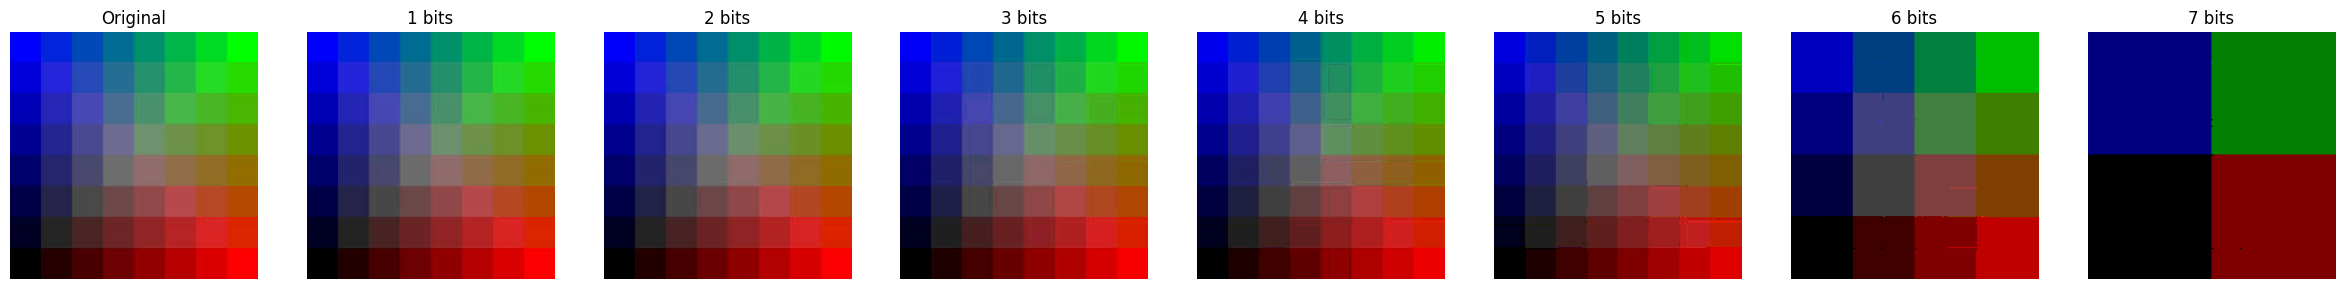

In [8]:
show_quantized_images(quantized_images0, img0)

In [9]:
img = read_image('atomicbomb.jpg')
quantized_images = quantize_images(img)

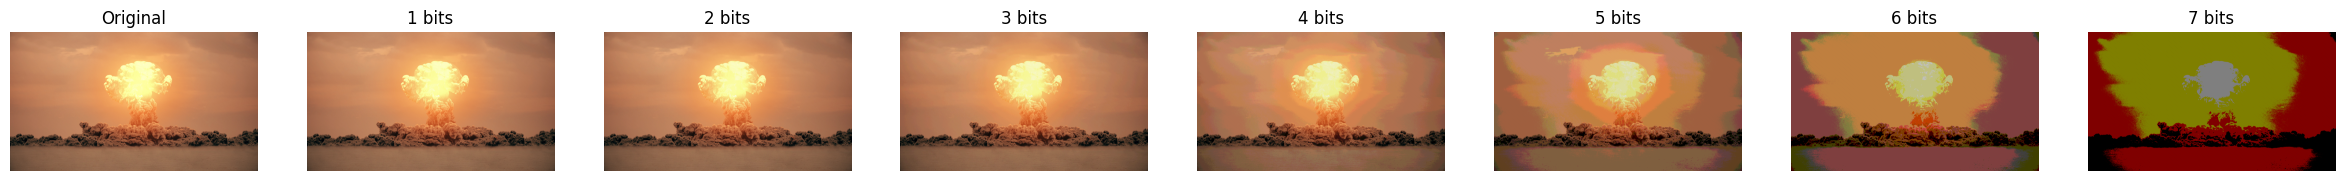

In [10]:
show_quantized_images(quantized_images, img)

#### Part - B

> `Bit Place Slicing`

In [11]:
img0 = read_image('quantize.jpg', cvtcolor="GRAY")
img = read_image('atomicbomb.jpg', cvtcolor="GRAY")

In [12]:
bitplane0 = BitPlanes(img0)
bitplane = BitPlanes(img)

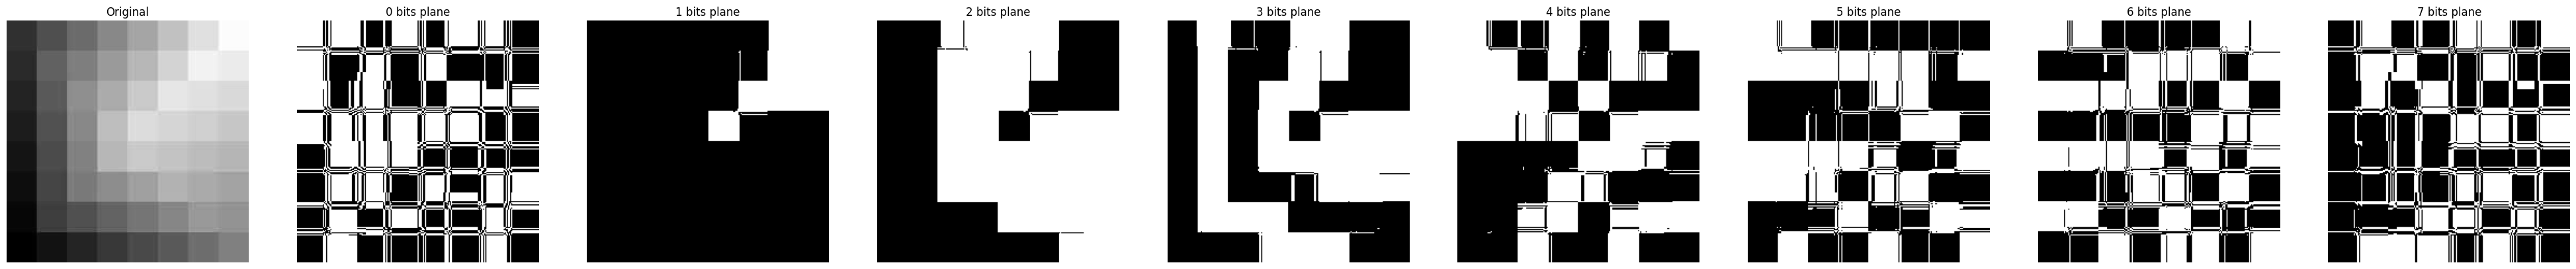

In [13]:
show_bitplane_images(bitplane0, img0)

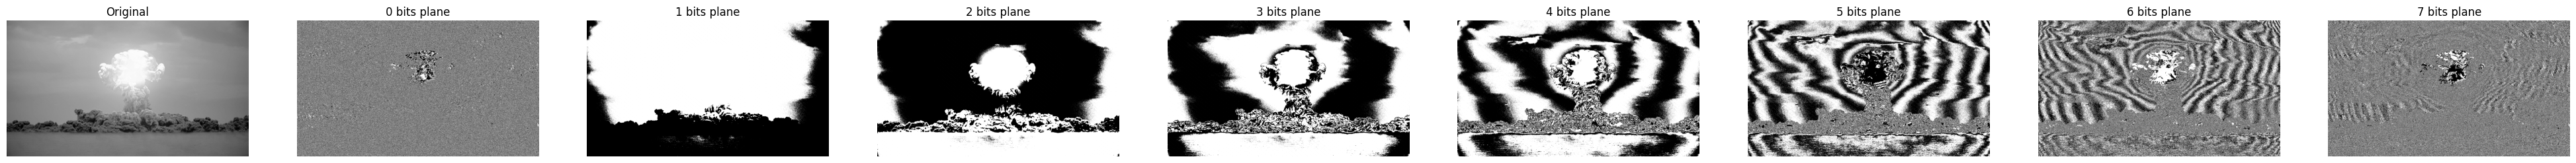

In [14]:
show_bitplane_images(bitplane, img)

> Observations:-

1. When we quantize the image, we tend to lose the information. This is because we are reducing the number of colors in the image effectively. This affects the clarity and fidelity of the image.

    The image becomes more montonous in color, then the color of the original image, as we increase the value of k (bits of quantization).

    Through the quantized image plots, we witness the trade-off between color accuracy and compression artifacts. The higher the value of k, the more the compression artifacts and the lower the color accuracy.

2. Analyzing the different bit planes gives us deeper understanding of the distribution of information across different bits. The change in higher bits is responsible for the major color change in the image, while the lower bits are responsible for the finer details.
